# csv processing and cleaning

Remove irrelevant variables and create dummy variables

In [1]:
import pandas as pd
import numpy as np
import re

### It seems like values are separated by semi-colons instead of commas

In [2]:
df2 = pd.read_csv("noon_perfumes_dataset.csv", on_bad_lines='skip')
df2.info()
df2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K
5,5,Roberto Cavalli,cavalli,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K
6,6,HUGO BOSS,The Scent,220.0,220.00,50,EDP,Women,Oriental,Roasted Cocoa,"Lavender, Osmanthus Flower",4.0,rich&light,43.0,4K
7,7,DORALL COLLECTION,Gold Secret,43.0,12.35,100,EDT,Men,Fruity,Labdanum and Musk,Lavender and Cloves,2.9,B.A.G,3.7,14.1K
8,8,GUCCI,Bamboo,575.0,189.00,75,EDP,Women,Floral,Sandalwood,Casablanca Lily and Ylang Ylang Extra-Comoros,4.8,Al-Najm,3.7,347
9,9,Yves Saint Laurent,M7 Oud Absolu,536.0,273.00,80,EDT,Men,Arabian,"Cistus, Myrrh, Oud, Amber",Patchouli,4.5,Al-Najm,3.7,347


In [3]:
df2 = df2.drop(columns=['Unnamed: 0', 'num_seller_ratings', 'seller_rating', 'seller', 'item_rating', 'old_price'])
df2 = df2.rename(columns={'department': 'gender'}).reset_index(drop=True)

df2.head(10)

,brand,name,new_price,ml,concentration,gender,scents,base_note,middle_note
0,PACO RABANNE,1 Million Lucky,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey"
1,Roberto Cavalli,Paradiso Assoluto,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily
2,S.T.Dupont,Royal Amber,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar
3,GUESS,Seductive Blue,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium
4,Roberto Cavalli,Uomo,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower
5,Roberto Cavalli,cavalli,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower
6,HUGO BOSS,The Scent,220.00,50,EDP,Women,Oriental,Roasted Cocoa,"Lavender, Osmanthus Flower"
7,DORALL COLLECTION,Gold Secret,12.35,100,EDT,Men,Fruity,Labdanum and Musk,Lavender and Cloves
8,GUCCI,Bamboo,189.00,75,EDP,Women,Floral,Sandalwood,Casablanca Lily and Ylang Ylang Extra-Comoros
9,Yves Saint Laurent,M7 Oud Absolu,273.00,80,EDT,Men,Arabian,"Cistus, Myrrh, Oud, Amber",Patchouli


In [4]:
df2['Gender_encoded'] = df2['gender'].apply(lambda x: 1 if x == 'Men' else (0 if x == 'Women' else 2))
df2.head(10)

,brand,name,new_price,ml,concentration,gender,scents,base_note,middle_note,Gender_encoded
0,PACO RABANNE,1 Million Lucky,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1
1,Roberto Cavalli,Paradiso Assoluto,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0
2,S.T.Dupont,Royal Amber,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2
3,GUESS,Seductive Blue,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1
4,Roberto Cavalli,Uomo,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0
5,Roberto Cavalli,cavalli,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0
6,HUGO BOSS,The Scent,220.00,50,EDP,Women,Oriental,Roasted Cocoa,"Lavender, Osmanthus Flower",0
7,DORALL COLLECTION,Gold Secret,12.35,100,EDT,Men,Fruity,Labdanum and Musk,Lavender and Cloves,1
8,GUCCI,Bamboo,189.00,75,EDP,Women,Floral,Sandalwood,Casablanca Lily and Ylang Ylang Extra-Comoros,0
9,Yves Saint Laurent,M7 Oud Absolu,273.00,80,EDT,Men,Arabian,"Cistus, Myrrh, Oud, Amber",Patchouli,1


In [5]:
df2 = df2.rename(columns={'new_price': 'price'})
df2 = df2.drop(columns=['ml'])

df2.head(5)

,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0


In [6]:
dup = df2[df2.duplicated()]
print(dup)

                brand                          name   price concentration  \
67            VERSACE                    Dylan Blue   20.50           EDT   
76            VERSACE                    Dylan Blue  217.85           EDT   
91              Ajmal                     Raindrops   47.95           EDP   
101      PACO RABANNE                      Invictus  210.00           EDT   
129           LACOSTE  Eau de Lacoste L. 12.12 Noir   85.00           EDT   
...               ...                           ...     ...           ...   
996   Roberto Cavalli             Paradiso Assoluto  139.00           EDP   
997   Roberto Cavalli              Paradiso Azzurro  165.00           EDP   
998             GUESS                          Dare   75.00           EDT   
1000            JOVAN               Musk Cologne Sp   19.00           EDT   
1002          LACOSTE            L.12.12 Blanc-Pure   94.20           EDT   

     gender  scents                                          base_note  \
6

In [7]:
df2 = df2.drop_duplicates()

In [8]:
df2.isnull().sum()

brand             0
name              0
price             0
concentration     0
gender            0
scents            0
base_note         0
middle_note       0
Gender_encoded    0
dtype: int64

In [9]:
print(df2.describe())

categorical_columns = ['brand', 'concentration', 'gender', 'scents']
for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(df2[col].value_counts())
    print()

            price  Gender_encoded
count  822.000000      822.000000
mean   153.323224        0.559611
std    113.300958        0.617033
min      5.350000        0.000000
25%     83.000000        0.000000
50%    137.500000        0.000000
75%    200.150000        1.000000
max    904.850000        2.000000
Frequency counts for brand:
brand
Calvin Klein         36
BURBERRY             30
HUGO BOSS            28
Roberto Cavalli      26
DORALL COLLECTION    25
                     ..
adidas                1
PENHALIGON'S          1
Laura Biagiotti       1
HOUBIGANT             1
JOVAN                 1
Name: count, Length: 160, dtype: int64

Frequency counts for concentration:
concentration
EDP    419
EDT    398
PDT      2
Oil      2
EDC      1
Name: count, dtype: int64

Frequency counts for gender:
gender
Women          417
Men            350
Unisex          54
Kids Unisex      1
Name: count, dtype: int64

Frequency counts for scents:
scents
Floral                 262
Woody                 

In [10]:
df2['scent_strength'] = df2['concentration'].map({'EDP': 2, 'EDT': 1, 'ETC': 0}).astype('Int64')

df2.head(10)

,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded,scent_strength
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1,1
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0,2
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2,2
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1,1
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2
5,Roberto Cavalli,cavalli,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2
6,HUGO BOSS,The Scent,220.00,EDP,Women,Oriental,Roasted Cocoa,"Lavender, Osmanthus Flower",0,2
7,DORALL COLLECTION,Gold Secret,12.35,EDT,Men,Fruity,Labdanum and Musk,Lavender and Cloves,1,1
8,GUCCI,Bamboo,189.00,EDP,Women,Floral,Sandalwood,Casablanca Lily and Ylang Ylang Extra-Comoros,0,2
9,Yves Saint Laurent,M7 Oud Absolu,273.00,EDT,Men,Arabian,"Cistus, Myrrh, Oud, Amber",Patchouli,1,1


In [11]:
# normalize price
df2['price_normalized'] = (df2['price'] - df2['price'].min()) / (df2['price'].max() - df2['price'].min())

df2.head(5)

,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded,scent_strength,price_normalized
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1,1,0.265926
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0,2,0.114063
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2,2,0.201834
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1,1,0.108783
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2,0.099611


In [12]:
df2['notes_diversity'] = df2[['base_note', 'middle_note']].apply(
    lambda x: sum(len(re.findall(r',|and', str(note))) + 1 for note in x), axis=1
)

df2.head(5)

,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded,scent_strength,price_normalized,notes_diversity
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1,1,0.265926,8
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0,2,0.114063,5
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2,2,0.201834,6
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1,1,0.108783,4
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2,0.099611,4


In [13]:
df2.to_csv("test_fra.csv", index=False)

In [ ]:
base_notes_split = df2['base_note'].str.split(r',|and', expand=True)
middle_notes_split = df2['middle_note'].str.split(r',|and', expand=True)

def clean_split_notes(notes_df):
    for col in range(notes_df.shape[1] - 1):
        notes_df.iloc[:, col] = notes_df.iloc[:, col].fillna('') + notes_df.iloc[:, col + 1].str.extract(r'^(\S+)', expand=False).fillna('')
        notes_df.iloc[:, col + 1] = notes_df.iloc[:, col + 1].str.replace(r'^\S+\s*', '', regex=True)
    return notes_df.replace('', None)

base_notes_split = clean_split_notes(base_notes_split)

middle_notes_split = clean_split_notes(middle_notes_split)

# "and" is two separate notes
def split_and_notes(notes_df):
    for col in range(notes_df.shape[1]):
        notes_df[col] = notes_df[col].str.split(r'\s+and\s+', expand=False)
    return notes_df

base_notes_split = base_notes_split.apply(lambda col: col.str.split(r'\s+and\s+').explode().reset_index(drop=True))
middle_notes_split = middle_notes_split.apply(lambda col: col.str.split(r'\s+and\s+').explode().reset_index(drop=True))

# Replace single "S" with "Salwood"
base_notes_split = base_notes_split.replace(['s', 'S'], 'Salwood')
middle_notes_split = middle_notes_split.replace(['s', 'S'], 'Salwood')

# Remove all 'AND' in notes
base_notes_split = base_notes_split.applymap(lambda x: re.sub(r'\bAND\b', '', x, flags=re.IGNORECASE) if isinstance(x, str) else x)
middle_notes_split = middle_notes_split.applymap(lambda x: re.sub(r'\bAND\b', '', x, flags=re.IGNORECASE) if isinstance(x, str) else x)

df3 = pd.concat([df2, base_notes_split, middle_notes_split], axis=1)



df3.head(5)

Original shape: (822, 12), New shape: (822, 36)


C:\Users\65963\AppData\Local\Temp\ipykernel_14724\4274722646.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\65963\AppData\Local\Temp\ipykernel_14724\4274722646.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r'\bAND\b', '', x, flags=re.IGNORECASE).strip() if isinstance(x, str) else x)


,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded,scent_strength,...,middle_note_2,middle_note_3,middle_note_4,middle_note_5,middle_note_6,middle_note_7,middle_note_8,middle_note_9,middle_note_10,middle_note_11
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1,1,...,Cashmir Wood,Cedar,Honey,None,None,None,None,None,None,None
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0,2,...,None,None,None,None,None,None,None,None,None,None
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2,2,...,Cedar,None,None,None,None,None,None,None,None,None
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1,1,...,None,None,None,None,None,None,None,None,None,None
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
base_notes_split = df2['base_note'].str.split(r',|and', expand=True)
middle_notes_split = df2['middle_note'].str.split(r',|and', expand=True)

def clean_notes(df):
    # Strip whitespace
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    # Replace single "S" with "Salwood"
    df = df.replace(['s', 'S'], 'Salwood')
    
    # Replace "alwood" with "Sandalwood"
    df = df.replace('alwood', 'Sandalwood')
    
    # Remove 'AND' 
    df = df.applymap(lambda x: re.sub(r'\bAND\b', '', x, flags=re.IGNORECASE).strip() if isinstance(x, str) else x)
    
    return df

base_notes_split = clean_notes(base_notes_split)
middle_notes_split = clean_notes(middle_notes_split)

base_columns = [f'base_note_{i}' for i in range(base_notes_split.shape[1])]
middle_columns = [f'middle_note_{i}' for i in range(middle_notes_split.shape[1])]

base_notes_split.columns = base_columns
middle_notes_split.columns = middle_columns

df3 = pd.concat([df2, base_notes_split, middle_notes_split], axis=1)

print(f"Original shape: {df2.shape}, New shape: {df3.shape}")

df3.head(5)


Original shape: (822, 12), New shape: (822, 36)


C:\Users\65963\AppData\Local\Temp\ipykernel_14724\278857636.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\65963\AppData\Local\Temp\ipykernel_14724\278857636.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r'\bAND\b', '', x, flags=re.IGNORECASE).strip() if isinstance(x, str) else x)


,brand,name,price,concentration,gender,scents,base_note,middle_note,Gender_encoded,scent_strength,...,middle_note_2,middle_note_3,middle_note_4,middle_note_5,middle_note_6,middle_note_7,middle_note_8,middle_note_9,middle_note_10,middle_note_11
0,PACO RABANNE,1 Million Lucky,244.55,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",1,1,...,Cashmir Wood,Cedar,Honey,None,None,None,None,None,None,None
1,Roberto Cavalli,Paradiso Assoluto,107.95,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,0,2,...,None,None,None,None,None,None,None,None,None,None
2,S.T.Dupont,Royal Amber,186.90,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,2,2,...,Cedar,None,None,None,None,None,None,None,None,None
3,GUESS,Seductive Blue,103.20,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,1,1,...,None,None,None,None,None,None,None,None,None,None
4,Roberto Cavalli,Uomo,94.95,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,0,2,...,None,None,None,None,None,None,None,None,None,None


In [27]:
df3.to_csv("final_fra2.csv", index=False)

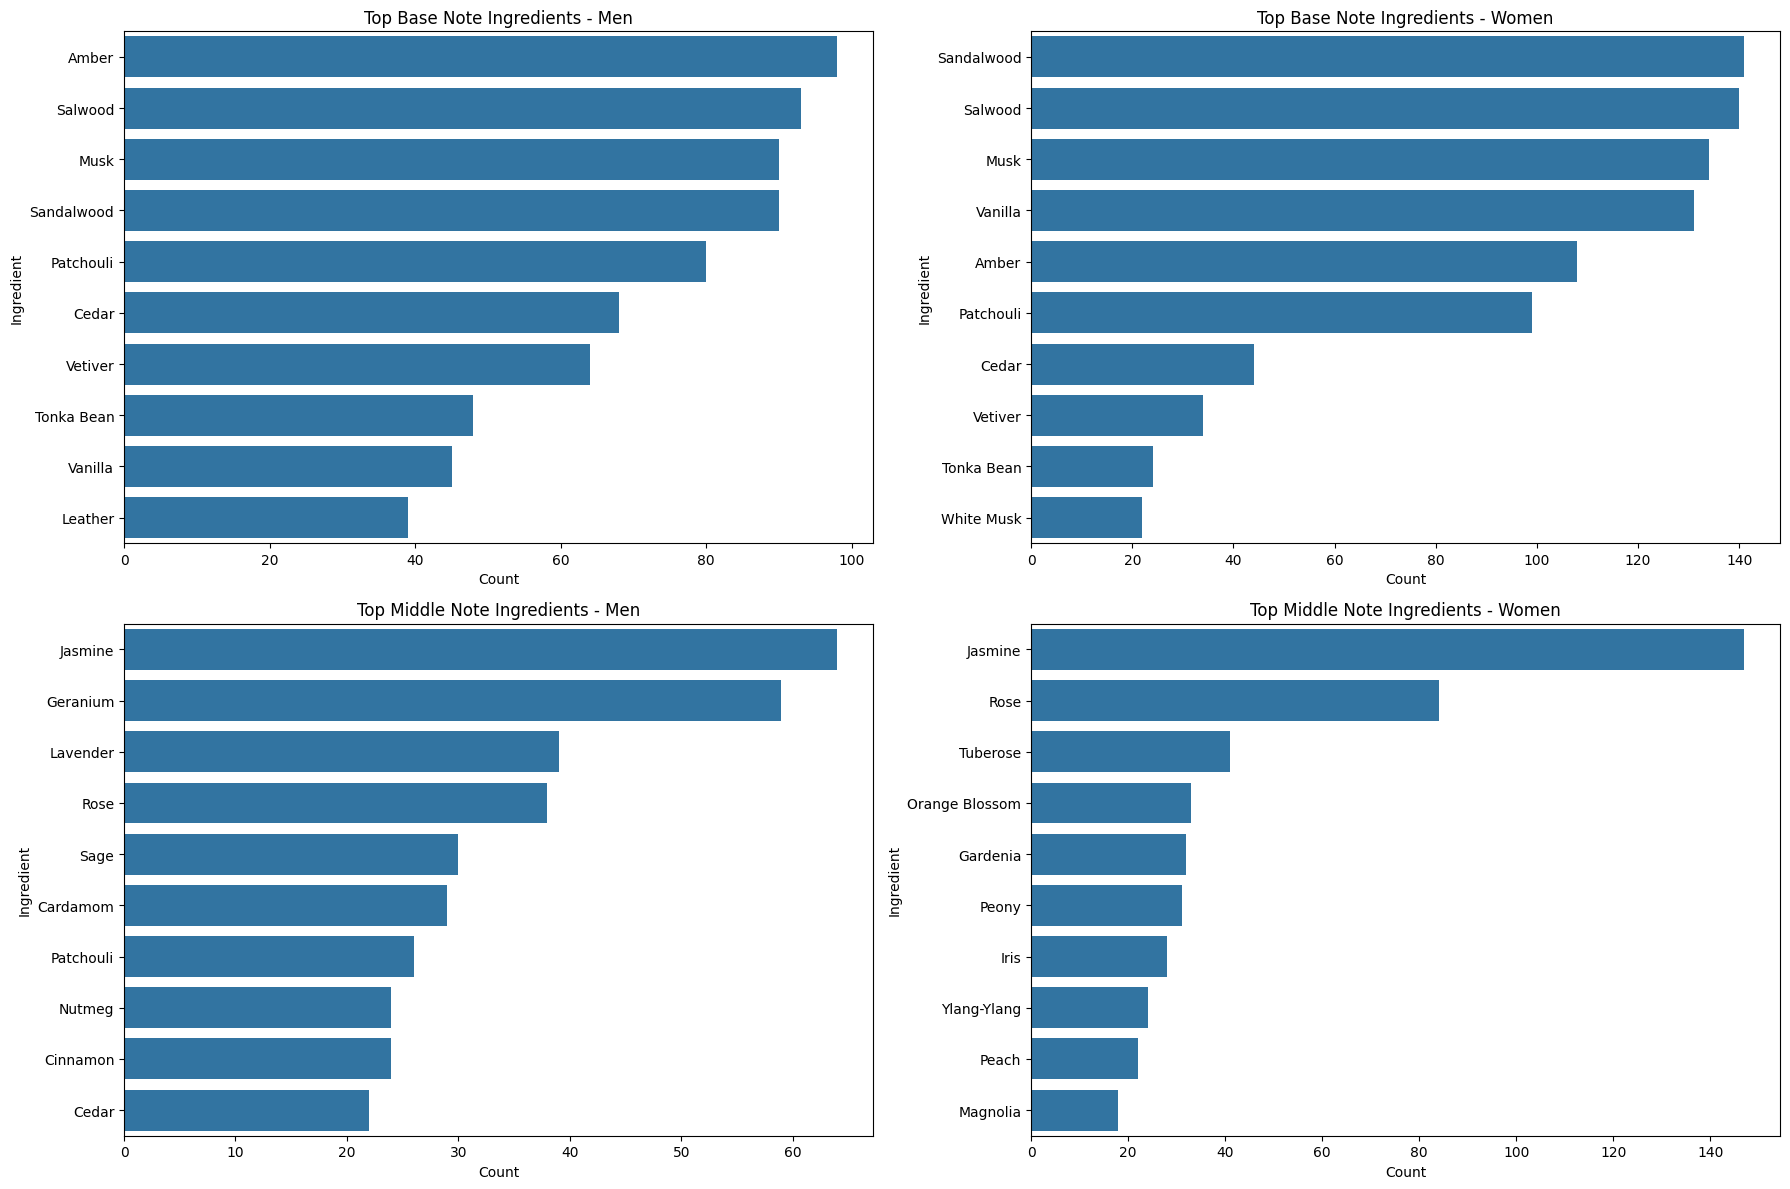

Summary of Unique Ingredients by Gender:

Men:
  Unique base note ingredients: 276
  Unique middle note ingredients: 386
  Total ingredient mentions: 2492

Women:
  Unique base note ingredients: 320
  Unique middle note ingredients: 423
  Total ingredient mentions: 2858

Unisex:
  Unique base note ingredients: 72
  Unique middle note ingredients: 88
  Total ingredient mentions: 341

Kids Unisex:
  Unique base note ingredients: 3
  Unique middle note ingredients: 4
  Total ingredient mentions: 7


In [ ]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt

def extract_ingredients_by_gender(df, gender_value, note_cols):
    gender_df = df[df['gender'] == gender_value]
    all_ingredients = []
    
    for col in note_cols:
        ingredients = gender_df[col].dropna().tolist()
        all_ingredients.extend(ingredients)
    
    return all_ingredients

base_ingredients = {}
middle_ingredients = {}

for gender in df3['gender'].unique():
    base_ingredients[gender] = Counter(extract_ingredients_by_gender(df3, gender, base_columns))
    middle_ingredients[gender] = Counter(extract_ingredients_by_gender(df3, gender, middle_columns))

# top 10 notes for each gender
def get_top_ingredients(ingredient_counter, n=10):
    return dict(sorted(ingredient_counter.items(), key=lambda x: x[1], reverse=True)[:n])

top_base_ingredients = {}
top_middle_ingredients = {}

for gender in df3['gender'].unique():
    top_base_ingredients[gender] = get_top_ingredients(base_ingredients[gender])
    top_middle_ingredients[gender] = get_top_ingredients(middle_ingredients[gender])

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)


for i, gender in enumerate(["Men", "Women"]):
    if gender in top_base_ingredients:
        sns.barplot(
            x=list(top_base_ingredients[gender].values()), 
            y=list(top_base_ingredients[gender].keys()), 
            ax=axes[0, i]
        )
        axes[0, i].set_title(f'Top Base Note Ingredients - {gender}')
        axes[0, i].set_xlabel('Count')
        axes[0, i].set_ylabel('Ingredient')


for i, gender in enumerate(["Men", "Women"]):
    if gender in top_middle_ingredients:
        sns.barplot(
            x=list(top_middle_ingredients[gender].values()), 
            y=list(top_middle_ingredients[gender].keys()), 
            ax=axes[1, i]
        )
        axes[1, i].set_title(f'Top Middle Note Ingredients - {gender}')
        axes[1, i].set_xlabel('Count')
        axes[1, i].set_ylabel('Ingredient')

plt.tight_layout()
plt.show()

print("Summary of Unique Ingredients by Gender:")
for gender in df3['gender'].unique():
    print(f"\n{gender}:")
    print(f"  Unique base note ingredients: {len(base_ingredients[gender])}")
    print(f"  Unique middle note ingredients: {len(middle_ingredients[gender])}")
    print(f"  Total ingredient mentions: {sum(base_ingredients[gender].values()) + sum(middle_ingredients[gender].values())}")

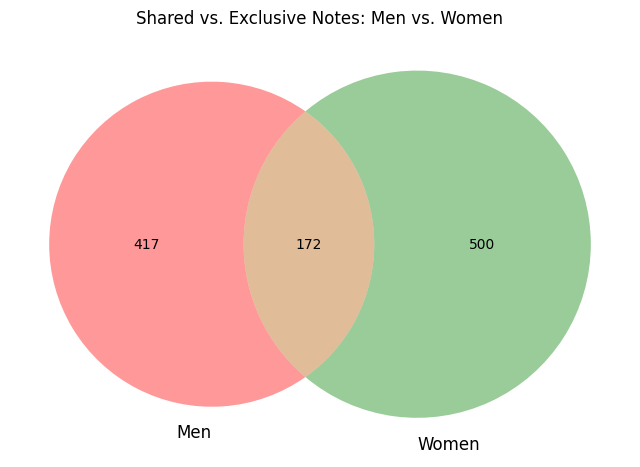

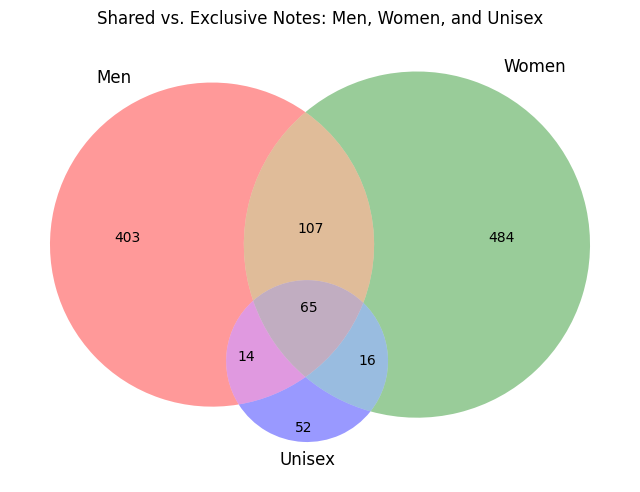

In [ ]:
from matplotlib_venn import venn2, venn3

men_notes = set(base_ingredients['Men'].keys()).union(set(middle_ingredients['Men'].keys()))
women_notes = set(base_ingredients['Women'].keys()).union(set(middle_ingredients['Women'].keys()))
unisex_notes = set(base_ingredients['Unisex'].keys()).union(set(middle_ingredients['Unisex'].keys()))

# Venn men women
plt.figure(figsize=(8, 8))
venn2([men_notes, women_notes], ('Men', 'Women'))
plt.title("Shared vs. Exclusive Notes: Men vs. Women")
plt.show()

# Venn for men, women, and unisex
plt.figure(figsize=(8, 8))
venn3([men_notes, women_notes, unisex_notes], ('Men', 'Women', 'Unisex'))
plt.title("Shared vs. Exclusive Notes: Men, Women, and Unisex")
plt.show()

In [ ]:
import pandas as pd

print("Pairwise Intersections:")
print(f"Men ∩ Women: {len(men_notes.intersection(women_notes))} notes")
print(f"Men ∩ Unisex: {len(men_notes.intersection(unisex_notes))} notes")
print(f"Women ∩ Unisex: {len(women_notes.intersection(unisex_notes))} notes")

kids_unisex_base = set(base_ingredients.get('Kids Unisex', {}).keys())
kids_unisex_middle = set(middle_ingredients.get('Kids Unisex', {}).keys())
kids_unisex_notes = kids_unisex_base.union(kids_unisex_middle)

print(f"Men ∩ Kids Unisex: {len(men_notes.intersection(kids_unisex_notes))} notes")
print(f"Women ∩ Kids Unisex: {len(women_notes.intersection(kids_unisex_notes))} notes")
print(f"Unisex ∩ Kids Unisex: {len(unisex_notes.intersection(kids_unisex_notes))} notes")

print("\nThree-way Intersections:")
men_women_unisex = men_notes.intersection(women_notes).intersection(unisex_notes)
print(f"Men ∩ Women ∩ Unisex: {len(men_women_unisex)} notes")

print("\nFour-way Intersection:")
all_gender_common = men_women_unisex.intersection(kids_unisex_notes)
print(f"Men ∩ Women ∩ Unisex ∩ Kids Unisex: {len(all_gender_common)} notes")

print("\nTop 10 notes common across Men, Women, and Unisex fragrances:")
common_notes_list = list(men_women_unisex)
common_notes_list.sort()
for i, note in enumerate(common_notes_list[:10]):
    if note:  # Skip empty string
        print(f"{i+1}. {note}")


def get_note_percentage(note, gender, ingredients_dict, total_counts):
    if gender in ingredients_dict and note in ingredients_dict[gender]:
        return round(ingredients_dict[gender][note] / total_counts[gender] * 100, 1)
    return 0

combined_ingredients = {}
for gender in base_ingredients.keys():
    combined_ingredients[gender] = Counter(base_ingredients[gender])
    combined_ingredients[gender].update(middle_ingredients[gender])

common_notes_data = []
for note in men_women_unisex:
    if note and note in kids_unisex_notes or (
        sum([1 for gender in combined_ingredients if note in combined_ingredients[gender]]) >= 3):
        row = {'Note': note}
        for gender in combined_ingredients:
            row[f"{gender} Count"] = combined_ingredients[gender].get(note, 0)
        common_notes_data.append(row)

if common_notes_data:
    common_notes_df = pd.DataFrame(common_notes_data)
    common_notes_df = common_notes_df.sort_values(by=['Men Count', 'Women Count'], ascending=False)
    print("\nMost common notes that appear across gender categories:")
    print(common_notes_df.head(15))


Pairwise Intersections:
Men ∩ Women: 172 notes
Men ∩ Unisex: 79 notes
Women ∩ Unisex: 81 notes
Men ∩ Kids Unisex: 4 notes
Women ∩ Kids Unisex: 5 notes
Unisex ∩ Kids Unisex: 4 notes

Three-way Intersections:
Men ∩ Women ∩ Unisex: 65 notes

Four-way Intersection:
Men ∩ Women ∩ Unisex ∩ Kids Unisex: 4 notes

Top 10 notes common across Men, Women, and Unisex fragrances:
2. Agarwood (Oud)
3. Amber
4. Ambroxan
5. Apple
6. Benzoin
7. Black Currant
8. Bulgarian Rose
9. Caraway
10. Cardamom

Most common notes that appear across gender categories:
          Note  Men Count  Women Count  Unisex Count  Kids Unisex Count
22     Salwood        109          148            19                  1
42  Sandalwood        107          149            19                  1
6    Patchouli        106          101            12                  1
33       Amber        101          113            22                  0
50        Musk         94          147            13                  0
18       Cedar         9

In [ ]:
men_exclusive = men_notes - (women_notes | unisex_notes | kids_unisex_notes)
women_exclusive = women_notes - (men_notes | unisex_notes | kids_unisex_notes)
unisex_exclusive = unisex_notes - (men_notes | women_notes | kids_unisex_notes)
kids_unisex_exclusive = kids_unisex_notes - (men_notes | women_notes | unisex_notes)

print(f"Men exclusive notes: {len(men_exclusive)}")
print(f"Women exclusive notes: {len(women_exclusive)}")
print(f"Unisex exclusive notes: {len(unisex_exclusive)}")
print(f"Kids Unisex exclusive notes: {len(kids_unisex_exclusive)}")

def get_top_exclusive_notes(exclusive_notes, ingredients_dict, gender, n=10):
    exclusive_counts = {}
    for note in exclusive_notes:
        if note in ingredients_dict[gender]:
            exclusive_counts[note] = ingredients_dict[gender][note]
    
    sorted_notes = sorted(exclusive_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_notes[:n]

print("\nTop 10 exclusive notes for Men fragrances:")
for note, count in get_top_exclusive_notes(men_exclusive, combined_ingredients, 'Men'):
    if note:
        print(f"- {note}: {count} occurrences")

print("\nTop 10 exclusive notes for Women fragrances:")
for note, count in get_top_exclusive_notes(women_exclusive, combined_ingredients, 'Women'):
    if note:
        print(f"- {note}: {count} occurrences")

print("\nTop exclusive notes for Unisex fragrances:")
for note, count in get_top_exclusive_notes(unisex_exclusive, combined_ingredients, 'Unisex'):
    if note:
        print(f"- {note}: {count} occurrences")

print("\nAll exclusive notes for Kids Unisex fragrances:")
for note, count in get_top_exclusive_notes(kids_unisex_exclusive, combined_ingredients, 'Kids Unisex'):
    if note:
        print(f"- {note}: {count} occurrences")


Men exclusive notes: 403
Women exclusive notes: 483
Unisex exclusive notes: 52
Kids Unisex exclusive notes: 2

Top 10 exclusive notes for Men fragrances:
- Clary Sage: 14 occurrences
- Fir: 10 occurrences
- Brazilian Rosewood: 7 occurrences
- Olibanum: 7 occurrences
- geranium: 7 occurrences
- Black Basil: 6 occurrences
- Coumarin: 6 occurrences
- Birch: 6 occurrences
- tonka bean: 6 occurrences
- Spices: 4 occurrences

Top 10 exclusive notes for Women fragrances:
- Peony: 31 occurrences
- Jasmine Sambac: 13 occurrences
- Wild Jasmine: 9 occurrences
- Lilac: 8 occurrences
- Red Lily: 5 occurrences
- Plum: 5 occurrences
- Watermelon: 5 occurrences
- Sambac Jasmine: 4 occurrences
- Blackberry: 4 occurrences
- Fruity: 4 occurrences

Top exclusive notes for Unisex fragrances:
- Wood Moss: 2 occurrences
- Citric: 1 occurrences
- Lavender Sage: 1 occurrences
- Agar: 1 occurrences
- Rare Wood: 1 occurrences
- wood: 1 occurrences
- Green Tea  Green Accord: 1 occurrences
- A: 1 occurrences
- Li